In [94]:
import os
import pandas as pd
import numpy as np

# Path to the directory containing the data files
data_dir = 'tc_data'

# Dictionary to store the dataframes
data_dict = {}

# Loop over all the files in the directory and load them into dataframes
for file_name in os.listdir(data_dir):
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Construct the full path to the file
        file_path = os.path.join(data_dir, file_name)
        
        # Load the CSV file into a dataframe
        df = pd.read_csv(file_path)
        
        # Add the dataframe to the dictionary with the filename as the key
        data_dict[file_name] = df

In [95]:
data_dict.keys()

dict_keys(['tech_companies_cash_flow.csv', 'tech_companies_earning_calendar_12months.csv', 'tech_companies_earning_calendar_6months.csv', 'tech_companies_earning.csv', 'tech_companies_balance_sheet.csv', 'tech_companies_earning_calendar_3months.csv', 'tech_companies_income_statements.csv'])

In [96]:
data_dict['tech_companies_cash_flow.csv']['netIncome']

0      29998000000
1      20721000000
2      19442000000
3      25010000000
4      34630000000
          ...     
276     3884000000
277     -393000000
278     4114000000
279     3872000000
280     3561000000
Name: netIncome, Length: 281, dtype: int64

In [97]:
# Loop through each dataframe in the dictionary
for key, value in data_dict.items():
    # Print the name of the dataframe
    print(f"Columns for {key}:")
    
    # Print the column names of the dataframe
    for col_name in value.columns:
        print(f" -> {col_name}")
    
    print("---")  # Separate each dataframe's columns with a line

Columns for tech_companies_cash_flow.csv:
 -> fiscalDateEnding
 -> reportedCurrency
 -> operatingCashflow
 -> paymentsForOperatingActivities
 -> proceedsFromOperatingActivities
 -> changeInOperatingLiabilities
 -> changeInOperatingAssets
 -> depreciationDepletionAndAmortization
 -> capitalExpenditures
 -> changeInReceivables
 -> changeInInventory
 -> profitLoss
 -> cashflowFromInvestment
 -> cashflowFromFinancing
 -> proceedsFromRepaymentsOfShortTermDebt
 -> paymentsForRepurchaseOfCommonStock
 -> paymentsForRepurchaseOfEquity
 -> paymentsForRepurchaseOfPreferredStock
 -> dividendPayout
 -> dividendPayoutCommonStock
 -> dividendPayoutPreferredStock
 -> proceedsFromIssuanceOfCommonStock
 -> proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet
 -> proceedsFromIssuanceOfPreferredStock
 -> proceedsFromRepurchaseOfEquity
 -> proceedsFromSaleOfTreasuryStock
 -> changeInCashAndCashEquivalents
 -> changeInExchangeRate
 -> netIncome
 -> Ticker
 -> Report
---
Columns for tech_companies_earni

In [98]:
data_dict['tech_companies_cash_flow.csv'][data_dict['tech_companies_cash_flow.csv']['Ticker'] == 'META']['dividendPayout']

120    None
121    None
122    None
123    None
124    None
125    None
126    None
127    None
128    None
129    None
130    None
131    None
132    None
133    None
134    None
135    None
136    None
137    None
138    None
139    None
Name: dividendPayout, dtype: object

---

In [99]:
tech_companies_earning_df = pd.read_csv('tc_data/tech_companies_earning.csv')
tech_companies_income_statements_df = pd.read_csv('tc_data/tech_companies_income_statements.csv')
tech_companies_balance_sheet_df = pd.read_csv('tc_data/tech_companies_balance_sheet.csv')
tech_companies_cash_flow_df = pd.read_csv('tc_data/tech_companies_cash_flow.csv')
bars_df = pd.read_csv('bars_final_daily.csv')

# Extract the necessary data
earnings = tech_companies_earning_df[['Ticker', 'fiscalDateEnding', 'reportedEPS']]
income_statements = tech_companies_income_statements_df[['Ticker', 'fiscalDateEnding', 'totalRevenue', 'grossProfit', 'operatingIncome', 'netIncome']]
balance_sheet = tech_companies_balance_sheet_df[['Ticker', 'fiscalDateEnding', 'totalAssets', 'totalCurrentAssets', 'totalCurrentLiabilities', 'totalShareholderEquity', 'shortLongTermDebtTotal']]
cash_flow = tech_companies_cash_flow_df[['Ticker', 'fiscalDateEnding', 'operatingCashflow', 'capitalExpenditures']]

financial_data = earnings.merge(
    income_statements,
    on=['Ticker', 'fiscalDateEnding']
).merge(
    balance_sheet,
    on=['Ticker', 'fiscalDateEnding']
).merge(
    cash_flow,
    on=['Ticker', 'fiscalDateEnding']
)

financial_data = financial_data.rename(columns={'fiscalDateEnding': 't', 'Ticker': 'symbol'})
financial_data.head()

,symbol,t,reportedEPS,totalRevenue,grossProfit,operatingIncome,netIncome,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalShareholderEquity,shortLongTermDebtTotal,operatingCashflow,capitalExpenditures
0,AAPL,2022-12-31,1.88,116151000000,50332000000,36016000000,29998000000,346747000000,128777000000,137286000000,56727000000,111143000000,34005000000,3787000000
1,AAPL,2022-09-30,1.29,89319000000,38095000000,24894000000,20721000000,352755000000,135405000000,153982000000,50672000000,233256000000,24127000000,3289000000
2,AAPL,2022-06-30,1.20,82240000000,35885000000,23076000000,19442000000,336309000000,112292000000,129873000000,58107000000,119682000000,22892000000,2102000000
3,AAPL,2022-03-31,1.52,96587000000,42559000000,29979000000,25010000000,350662000000,118180000000,127508000000,67399000000,119999000000,28166000000,2514000000
4,AAPL,2021-12-31,2.10,123251000000,54243000000,41488000000,34630000000,381191000000,153154000000,147574000000,71932000000,122800000000,46966000000,2803000000


In [100]:
# Resample and forward fill the financial_data DataFrame
financial_data['t'] = pd.to_datetime(financial_data['t'])
financial_data['fiscalDate'] = financial_data['t']
financial_data = financial_data.set_index(['symbol', 't'])

financial_data_hourly = (
    financial_data.groupby('symbol')
    .apply(lambda x: x.reset_index(level=0, drop=True).resample('1D').ffill())
    .reset_index(level=0, drop=False)
)

In [101]:
financial_data_hourly = financial_data_hourly.reset_index()

financial_data_hourly['financial_data_age'] = (financial_data_hourly['t'] - financial_data_hourly['fiscalDate']).dt.total_seconds() / 3600
financial_data_hourly = financial_data_hourly.drop(columns=['fiscalDate'])

financial_data_hourly = financial_data_hourly.set_index(['symbol', 't'])
financial_data_hourly

reportedEPS  totalRevenue   grossProfit  operatingIncome  \
symbol t                                                                      
AAPL   2018-03-31       0.6825   61137000000   23422000000      15894000000   
       2018-04-01       0.6825   61137000000   23422000000      15894000000   
       2018-04-02       0.6825   61137000000   23422000000      15894000000   
       2018-04-03       0.6825   61137000000   23422000000      15894000000   
       2018-04-04       0.6825   61137000000   23422000000      15894000000   
...                        ...           ...           ...              ...   
XOM    2022-12-27       4.4500  112070000000  109592000000     107050000000   
       2022-12-28       4.4500  112070000000  109592000000     107050000000   
       2022-12-29       4.4500  112070000000  109592000000     107050000000   
       2022-12-30       4.4500  112070000000  109592000000     107050000000   
       2022-12-31       3.4000   95429000000   91753000000      88039000000   

                     netIncome   totalAssets  totalCurrentAssets  \
symbol t                                                           
AAPL   2018-03-31  13822000000  367502000000        130053000000   
       2018-04-01  13822000000  367502000000        130053000000   
       2018-04-02  13822000000  367502000000        130053000000   
       2018-04-03  13822000000  367502000000        130053000000   
       2018-04-04  13822000000  367502000000        130053000000   
...                        ...           ...                 ...   
XOM    2022-12-27  19660000000  370152000000         99289000000   
       2022-12-28  19660000000  370152000000         99289000000   
       2022-12-29  19660000000  370152000000         99289000000   
       2022-12-30  19660000000  370152000000         99289000000   
       2022-12-31  12750000000  369067000000         97631000000   

                   totalCurrentLiabilities  totalShareholderEquity  \
symbol t                                                             
AAPL   2018-03-31              89320000000            126878000000   
       2018-04-01              89320000000            126878000000   
       2018-04-02              89320000000            126878000000   
       2018-04-03              89320000000            126878000000   
       2018-04-04              89320000000            126878000000   
...                                    ...                     ...   
XOM    2022-12-27              74057000000            186100000000   
       2022-12-28              74057000000            186100000000   
       2022-12-29              74057000000            186100000000   
       2022-12-30              74057000000            186100000000   
       2022-12-31              69045000000            195049000000   

                  shortLongTermDebtTotal  operatingCashflow  \
symbol t                                                      
AAPL   2018-03-31           122881000000        15130000000   
       2018-04-01           122881000000        15130000000   
       2018-04-02           122881000000        15130000000   
       2018-04-03           122881000000        15130000000   
       2018-04-04           122881000000        15130000000   
...                                  ...                ...   
XOM    2022-12-27            45428000000        24425000000   
       2022-12-28            45428000000        24425000000   
       2022-12-29            45428000000        24425000000   
       2022-12-30            45428000000        24425000000   
       2022-12-31            14495000000        17621000000   

                  capitalExpenditures  financial_data_age  
symbol t                                                   
AAPL   2018-03-31          4041000000                 0.0  
       2018-04-01          4041000000                24.0  
       2018-04-02          4041000000                48.0  
       2018-04-03          4041000000                72.0  
       2018-04-

In [102]:
bars_df = pd.read_csv('bars_final_daily.csv')
bars_df = bars_df.drop(columns=['Unnamed: 0'])
bars_df['t'] = pd.to_datetime(bars_df['t'])
bars_df = bars_df.set_index(['symbol', 't'])
bars_df

level_0      emaS      emaM      emaL  \
symbol t                                                                 
AAPL   2015-12-01 00:00:00+00:00    AAPL       NaN       NaN       NaN   
       2015-12-02 00:00:00+00:00    AAPL  0.992642  0.992642  0.992642   
       2015-12-03 00:00:00+00:00    AAPL  0.990861  0.991084  0.991133   
       2015-12-04 00:00:00+00:00    AAPL  1.001153  0.998980  0.998524   
       2015-12-05 00:00:00+00:00    AAPL  1.006490  1.003317  1.002589   
...                                  ...       ...       ...       ...   
XOM    2023-03-27 00:00:00+00:00     XOM  1.004891  0.999151  0.998943   
       2023-03-28 00:00:00+00:00     XOM  1.008241  1.000655  0.999467   
       2023-03-29 00:00:00+00:00     XOM  1.010656  1.002067  0.999992   
       2023-03-30 00:00:00+00:00     XOM  1.009771  1.002633  1.000255   
       2023-03-31 00:00:00+00:00     XOM  1.007286  1.002602  1.000323   

                                       std        pc      pc12        mvS  \
symbol t                                                                    
AAPL   2015-12-01 00:00:00+00:00       NaN       NaN  0.005564  17.363743   
       2015-12-02 00:00:00+00:00       NaN       NaN  0.006017  17.336816   
       2015-12-03 00:00:00+00:00 -6.166172 -0.695322  0.007002  17.434221   
       2015-12-04 00:00:00+00:00 -4.375985  1.118318 -0.011176  17.608162   
       2015-12-05 00:00:00+00:00 -4.353121  0.886985 -0.039841  14.135969   
...                                    ...       ...       ...        ...   
XOM    2023-03-27 00:00:00+00:00 -4.156453  1.686993       NaN  16.576869   
       2023-03-28 00:00:00+00:00 -4.156023  0.987504       NaN  16.455213   
       2023-03-29 00:00:00+00:00 -4.155566  0.988295       NaN  16.459843   
       2023-03-30 00:00:00+00:00 -4.167902  0.500269       NaN  16.384692   
       2023-03-31 00:00:00+00:00 -4.184275  0.130881       NaN  16.413594   

                                        mvL        mnS        mnL        rsi  \
symbol t                                                                       
AAPL   2015-12-01 00:00:00+00:00  17.363743  12.138661  12.138661        NaN   
       2015-12-02 00:00:00+00:00  17.340930  12.117815  12.121000   0.000000   
       2015-12-03 00:00:00+00:00  17.410354  12.256298  12.220620   0.000000   
       2015-12-04 00:00:00+00:00  17.526601  12.414379  12.329941  70.947343   
       2015-12-05 00:00:00+00:00  15.612475   8.852343  10.366451  70.947343   
...                                     ...        ...        ...        ...   
XOM    2023-03-27 00:00:00+00:00  15.498704  11.810867  10.722304  52.041227   
       2023-03-28 00:00:00+00:00  15.522088  11.729290  10.749971  58.291427   
       2023-03-29 00:00:00+00:00  15.553137  11.698300  10.779032  62.638816   
       2023-03-30 00:00:00+00:00  15.575473  11.647450  10.804170  64.634611   
       2023-03-31 00:00:00+00:00  15.604848  11.629467  10.830050  65.335151   

                                       rsid      rlmS      rlmL      rlmD  \
symbol t                                                                    
AAPL   2015-12-01 00:00:00+00:00        NaN  0.760806  0.760806  0.000000   
       2015-12-02 00:00:00+00:00   0.000000  0.729144  0.733981 -0.004837   
       2015-12-03 00:00:00+00:00   0.000000  0.916621  0.868665  0.047956   
       2015-12-04 00:00:00+00:00  37.340707  1.135920  1.019917  0.116003   
       2015-12-05 00:00:00+00:00  21.829952 -0.646263  0.053280 -0.699544   
...                                     ...       ...       ...       ...   
XOM    2023-03-27 00:00:00+00:00   8.539396  1.218535  0.734802  0.483733   
       2023-03-28 00:00:00+00:00   9.859731  1.139716  0.743012  0.396705   
       2023-03-29 00:00:00+00:00   9.471413  0.930752  0.735373  0.195379   
       2023-03-30 00:00:00+00:00   7.644805  0.681275  0.717026 -0.035751   
       2023-03-31 00:00:00+00:00   5.563563  0.491990  0.697010 -0.205021   

                         

In [103]:
# Check the data types of the timestamp columns
print(f"Data type of 't' column in bars_df: {bars_df.index.get_level_values('t').dtype}")
print(f"Data type of 't' column in financial_data: {financial_data_hourly.index.get_level_values('t').dtype}")

Data type of 't' column in bars_df: datetime64[ns, UTC]
Data type of 't' column in financial_data: datetime64[ns]


In [104]:
bars_df = bars_df.reset_index()
bars_df['t'] = bars_df['t'].dt.tz_convert(None)

# Set the 't' column as the index
bars_df = bars_df.set_index(['symbol', 't'])

# Check the data types of the timestamp columns again
print(f"Data type of 't' column in bars_df: {bars_df.index.get_level_values('t').dtype}")
print(f"Data type of 't' column in financial_data: {financial_data_hourly.index.get_level_values('t').dtype}")

Data type of 't' column in bars_df: datetime64[ns]
Data type of 't' column in financial_data: datetime64[ns]


In [105]:
merged_data = bars_df.merge(financial_data_hourly, left_index=True, right_index=True, how='left')
merged_data = merged_data.reset_index()
merged_data = merged_data.groupby('symbol').apply(lambda group: group.ffill()).dropna()
data = merged_data
data

,symbol,t,level_0,emaS,emaM,emaL,std,pc,pc12,mvS,...,operatingIncome,netIncome,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalShareholderEquity,shortLongTermDebtTotal,operatingCashflow,capitalExpenditures,financial_data_age
637,AAPL,2018-04-02,AAPL,0.995549,0.996890,0.999008,-4.405938,-0.582928,0.024649,14.601611,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,48.0
638,AAPL,2018-04-03,AAPL,0.997988,0.997459,0.999135,-4.420942,0.310485,0.034099,15.475625,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,72.0
639,AAPL,2018-04-04,AAPL,1.000673,0.998277,0.999361,-4.432137,0.561995,0.025329,16.103521,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,96.0
640,AAPL,2018-04-05,AAPL,1.009309,1.000973,1.000254,-4.368263,2.077456,0.006446,16.438531,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,120.0
641,AAPL,2018-04-06,AAPL,1.000860,0.999353,0.999719,-4.358112,-1.230848,0.028058,16.749311,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27590,XOM,2023-03-27,XOM,1.004891,0.999151,0.998943,-4.156453,1.686993,0.067726,16.576869,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0
27591,XOM,2023-03-28,XOM,1.008241,1.000655,0.999467,-4.156023,0.987504,0.067726,16.455213,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0
27592,XOM,2023-03-29,XOM,1.010656,1.002067,0.999992,-4.155566,0.988295,0.067726,16.459843,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0
27593,XOM,2023-03-30,XOM,1.009771,1.002633,1.000255,-4.167902,0.500269,0.067726,16.384692,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0


---

In [106]:
data['symbol'].unique()

array(['AAPL', 'AMZN', 'BABA', 'BAC', 'CVX', 'GOOG', 'JPM', 'KO', 'META',
       'MSFT', 'NVDA', 'PFE', 'TSLA', 'XOM'], dtype=object)

In [107]:
for col in ['shortLongTermDebtTotal', 'capitalExpenditures']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [108]:
data['P/E'] = data['vw'] / data['reportedEPS']
data['P/S'] = data['vw'] / (data['totalRevenue'] / data['totalShareholderEquity'])
data['P/B'] = data['vw'] / (data['totalShareholderEquity'] / data['totalShareholderEquity'])
# data['Dividend_Yield'] = None  # Assuming no dividend data available

data['EPS_Growth'] = data['reportedEPS'].pct_change()
data['EPS_Growth'][data['EPS_Growth'] == 0] = None
data['EPS_Growth'] = data.groupby('symbol')['EPS_Growth'].apply(lambda group: group.ffill())

data['ROE'] = data['netIncome'] / data['totalShareholderEquity']
data['ROA'] = data['netIncome'] / data['totalAssets']
data['Gross_Margin'] = data['grossProfit'] / data['totalRevenue']
data['Operating_Margin'] = data['operatingIncome'] / data['totalRevenue']
data['Net_Profit_Margin'] = data['netIncome'] / data['totalRevenue']
data['Current_Ratio'] = data['totalCurrentAssets'] / data['totalCurrentLiabilities']
data['Debt_to_Equity'] = data['shortLongTermDebtTotal'] / data['totalShareholderEquity']
data['FCF'] = data['operatingCashflow'] - data['capitalExpenditures']


KeyError: 'vw'

In [ ]:
data = data.set_index(['symbol', 't'])

<AxesSubplot:xlabel='symbol,t'>

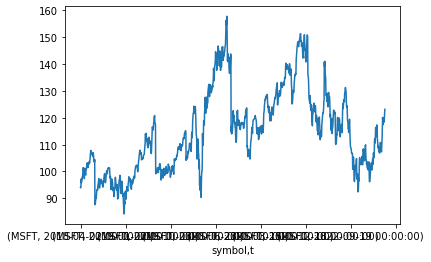

In [ ]:
data.groupby('symbol').get_group('MSFT')['P/E'].abs().plot()

In [ ]:
import pandas as pd

df_spy = pd.read_csv('bars_spy.csv')

# Convert 't' column to datetime format and remove timezone information
df_spy['t'] = pd.to_datetime(df_spy['t']).dt.tz_convert(None)

# Drop unnecessary columns
df_spy = df_spy.drop(columns=['symbol', 'o', 'h', 'c', 'l', 'v', 'n'])

# Rename 'vw' column to 'spy_value'
df_spy = df_spy.rename(columns={'vw': 'spy_value'})

# Set 't' column as index
df_spy = df_spy.set_index(['t'])

# Resample by day, drop NaN values, and take mean of daily values
df_spy = df_spy.resample('1D').mean().dropna()

print(df_spy.head())

             spy_value
t                     
2015-12-01  209.848520
2015-12-02  210.131983
2015-12-03  208.044027
2015-12-04  207.724243
2015-12-05  209.597537


In [ ]:
data = data.reset_index().merge(df_spy, how='left', on='t').set_index(['t', 'symbol'])
data.reset_index()

,t,symbol,level_0,o,h,l,c,v,n,vw,...,EPS_Growth,ROE,ROA,Gross_Margin,Operating_Margin,Net_Profit_Margin,Current_Ratio,Debt_to_Equity,FCF,spy_value
0,2018-04-02,AAPL,AAPL,167.60,168.9400,164.4700,166.58,37478027,290664,166.806767,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,259.747184
1,2018-04-03,AAPL,AAPL,167.50,168.7455,164.8800,168.00,30209047,207947,167.285105,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,258.973890
2,2018-04-04,AAPL,AAPL,165.75,172.0100,163.5900,171.98,34598276,240038,168.295972,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,260.158642
3,2018-04-05,AAPL,AAPL,173.01,174.2304,169.1900,169.59,26924563,188750,172.769572,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,265.168042
4,2018-04-06,AAPL,AAPL,170.81,172.4800,168.2000,168.49,35000494,251088,169.998610,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,262.067890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18119,2023-03-27,XOM,XOM,104.12,106.4800,103.5000,105.81,14781147,127011,105.232959,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,397.096410
18120,2023-03-28,XOM,XOM,106.13,107.8600,105.1900,107.49,10983474,105465,106.805258,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,395.710110
18121,2023-03-29,XOM,XOM,108.10,109.1600,107.4900,108.79,14204952,113133,108.459223,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,399.618580
18122,2023-03-30,XOM,XOM,109.40,109.7200,108.5200,109.40,11233289,103337,109.327059,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,403.328727


In [ ]:
list(data.columns)

['level_0',
 'o',
 'h',
 'l',
 'c',
 'v',
 'n',
 'vw',
 'diff',
 's',
 'emaS',
 'emaM',
 'emaL',
 'std',
 'pc',
 'pc12',
 'mvS',
 'mvL',
 'mnS',
 'mnL',
 'rsi',
 'rsid',
 'rlmS',
 'rlmL',
 'rlmD',
 'obv',
 'obvmS',
 'obvmL',
 'obvsL',
 'obvSH',
 'lavgv',
 'lavm',
 'lavs',
 'avgv',
 'ewm_12',
 'ewm_26',
 'macd',
 'signal',
 'macd_std',
 'macds',
 'reportedEPS',
 'totalRevenue',
 'grossProfit',
 'operatingIncome',
 'netIncome',
 'totalAssets',
 'totalCurrentAssets',
 'totalCurrentLiabilities',
 'totalShareholderEquity',
 'shortLongTermDebtTotal',
 'operatingCashflow',
 'capitalExpenditures',
 'financial_data_age',
 'P/E',
 'P/S',
 'P/B',
 'EPS_Growth',
 'ROE',
 'ROA',
 'Gross_Margin',
 'Operating_Margin',
 'Net_Profit_Margin',
 'Current_Ratio',
 'Debt_to_Equity',
 'FCF',
 'spy_value']

In [ ]:
data.drop(columns=[
    'reportedEPS', 'totalRevenue', 'grossProfit', 'operatingIncome', 'netIncome', 'totalAssets',
    'totalCurrentAssets', 'totalCurrentLiabilities', 'totalShareholderEquity', 'shortLongTermDebtTotal',
    'operatingCashflow', 'capitalExpenditures'
]).to_csv('data_project_vgm_daily.csv')

Here are 10 additional financial metrics that can be calculated using the additional columns in Python:

1. Enterprise value (EV):
```
market_cap = ? # This would need to be obtained from a separate data source
total_debt = df['proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet'] + df['dividendPayoutPreferredStock']
cash_and_cash_equivalents = df['cashAndCashEquivalentsAtCarryingValue']
ev = market_cap + total_debt - cash_and_cash_equivalents
```

2. Free cash flow (FCF):
```
operating_cash_flow = df['changeInOperatingLiabilities'] + df['changeInOperatingAssets']
capital_expenditures = df['propertyPlantEquipment'] - df['accumulatedDepreciationAmortizationPPE']
fcf = operating_cash_flow - capital_expenditures
```

3. Price-to-sales (P/S) ratio:
```
market_price_per_share = ? # This would need to be obtained from a separate data source
revenue_per_share = df['revenues'] / df['Ticker']
ps_ratio = market_price_per_share / revenue_per_share
```

4. Debt-to-asset ratio:
```
total_debt = df['proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet'] + df['dividendPayoutPreferredStock']
total_assets = df['totalAssets']
debt_to_asset_ratio = total_debt / total_assets
```

5. Return on invested capital (ROIC):
```
ebit = df['ebit']
tax_rate = ? # This would need to be obtained from a separate data source
invested_capital = df['totalAssets'] - df['totalCurrentLiabilities'] - ((df['totalAssets'] - df['totalCurrentLiabilities']) - df['totalLiabilities']) + df['accumulatedDepreciationAmortizationPPE'] + df['intangibleAssets']
roic = (ebit * (1 - tax_rate)) / invested_capital
```

6. Price-to-cash flow (P/CF) ratio:
```
market_price_per_share = ? # This would need to be obtained from a separate data source
operating_cash_flow_per_share = df['changeInOperatingLiabilities'] / df['Ticker']
pcf_ratio = market_price_per_share / operating_cash_flow_per_share
```

7. Return on invested assets (ROIA):
```
gross_profit = df['grossProfit']
interest_and_debt_expense = df['interestAndDebtExpense']
invested_assets = df['propertyPlantEquipment'] + df['intangibleAssets'] + df['shortTermInvestments'] + df['longTermInvestments']
roia = (gross_profit - interest_and_debt_expense) / invested_assets
```

8. Price-to-book (P/B) ratio:
```
market_price_per_share = ? # This would need to be obtained from a separate data source
book_value_per_share = df['totalShareholderEquity'] / df['commonStockSharesOutstanding']
pb_ratio = market_price_per_share / book_value_per_share
```

9. Gross margin:
```
gross_profit = df['grossProfit']
revenue = df['totalRevenue']
gross_margin = gross_profit / revenue
```

10. Inventory turnover ratio:
```
cost_of_goods_sold = df['costofGoodsAndServicesSold']
average_inventory = (df['inventory'] + df['inventory'].shift(1)) / 2
inventory_turnover_ratio = cost_of_goods_sold / average_inventory
``` 

Note that some of these metrics may require additional information such as market price per share, tax rate or currency exchange rates, which would need to be obtained from another data source. Also, this is not an exhaustive list and there are many other financial metrics that can be calculated using the provided attributes.

---

# DCF calculation

In [ ]:
# DCF calculation

import pandas as pd
import numpy as np

ticker = 'AAPL'

# Load data from CSV files
earning_calendar_12months = pd.read_csv('tc_data/tech_companies_earning_calendar_12months.csv')
earning_calendar_6months = pd.read_csv('tc_data/tech_companies_earning_calendar_6months.csv')
earning_calendar_3months = pd.read_csv('tc_data/tech_companies_earning_calendar_3months.csv')
income_statements = pd.read_csv('tc_data/tech_companies_income_statements.csv')
balance_sheet = pd.read_csv('tc_data/tech_companies_balance_sheet.csv')
cash_flow = pd.read_csv('tc_data/tech_companies_cash_flow.csv')

df_bars = pd.read_csv('bars_final.csv')
df_spy = pd.read_csv('bars_spy.csv')

"""
earning_calendar_12months -> 12m
earning_calendar_6months -> 6m
earning_calendar_3months -> 3m
income_statements -> 3m
balance_sheet -> 3m
cash_flow -> 3m
df_bars -> 1h
"""

earning_calendar_12months = earning_calendar_12months[earning_calendar_12months['symbol'] == ticker]
earning_calendar_6months = earning_calendar_6months[earning_calendar_6months['symbol'] == ticker]
earning_calendar_3months = earning_calendar_3months[earning_calendar_3months['symbol'] == ticker]
income_statements = income_statements[income_statements['Ticker'] == ticker]
balance_sheet = balance_sheet[balance_sheet['Ticker'] == ticker]
cash_flow = cash_flow[cash_flow['Ticker'] == ticker]
df_bars = df_bars[df_bars['symbol'] == ticker]

In [ ]:
merged_data = pd.merge(df_bars, df_spy, on='t', how='left')
merged_data.head()

market_variance = merged_data['c_y'].pct_change().var()
covariance = merged_data['c_x'].pct_change().cov(merged_data['c_y'].pct_change())
beta = covariance / market_variance

print('Beta value is:', beta)

Beta value is: 1.1671881399366402


In [ ]:
# Define variables for DCF analysis
risk_free_rate = 0.02 # Can be adjusted based on current bond rates
market_return_rate = 0.08 # Can be adjusted based on historical market returns
tax_rate = 0.21 # Can be adjusted based on effective corporate tax rate

In [ ]:
numeric_cols = ['changeInOperatingLiabilities', 'changeInOperatingAssets']
for col in numeric_cols:
    cash_flow[col] = pd.to_numeric(cash_flow[col], errors='coerce')

numeric_cols = ['propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE']
for col in numeric_cols:
    balance_sheet[col] = pd.to_numeric(balance_sheet[col], errors='coerce')

In [ ]:
cash_flow['fiscalDateEnding'] = pd.to_datetime(cash_flow['fiscalDateEnding'])
balance_sheet['fiscalDateEnding'] = pd.to_datetime(balance_sheet['fiscalDateEnding'])

cash_flow.set_index('fiscalDateEnding', inplace=True)
balance_sheet.set_index('fiscalDateEnding', inplace=True)

cash_flow = cash_flow.sort_index(ascending=True)
balance_sheet = balance_sheet.sort_index(ascending=True)

<AxesSubplot:xlabel='fiscalDateEnding'>

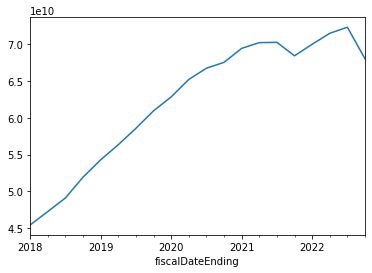

In [ ]:
balance_sheet['accumulatedDepreciationAmortizationPPE'].plot()

In [ ]:
balance_sheet

,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,...,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,Ticker,Report
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2018-03-31,USD,367502000000,130053000000,45059000000,87940000000,7662000000,22408000000,416735000000,3.507700e+10,45425000000,...,122881000000,26756000000,46855000000,126878000000,None,91898000000,38044000000,4943282000,AAPL,BALANCE_SHEET
2018-06-30,USD,349197000000,115761000000,31971000000,70970000000,5936000000,26367000000,406209000000,3.811700e+10,47251000000,...,115871000000,25184000000,45694000000,114949000000,None,79436000000,38624000000,4842917000,AAPL,BALANCE_SHEET
2018-09-30,USD,365725000000,131339000000,25913000000,25913000000,3956000000,48995000000,234386000000,4.130400e+10,49099000000,...,220132000000,33327000000,48914000000,107147000000,None,70400000000,40201000000,4754986000,AAPL,BALANCE_SHEET
2018-12-31,USD,373719000000,140828000000,44771000000,86427000000,4988000000,36981000000,232891000000,3.959700e+10,51929000000,...,115529000000,36703000000,54555000000,117892000000,None,80510000000,40970000000,4729803000,AAPL,BALANCE_SHEET
2019-03-31,USD,341998000000,123346000000,37988000000,80092000000,4884000000,26278000000,218652000000,3.874600e+10,54290000000,...,112922000000,35368000000,52165000000,105860000000,None,64558000000,42801000000,4607284000,AAPL,BALANCE_SHEET
2019-06-30,USD,322239000000,134973000000,50530000000,94614000000,3355000000,26474000000,187266000000,3.763600e+10,56348000000,...,108059000000,31673000000,51143000000,96456000000,None,53724000000,43371000000,4531395000,AAPL,BALANCE_SHEET
2019-09-30,USD,338516000000,162819000000,48844000000,100557000000,4106000000,45804000000,175697000000,3.737800e+10,58579000000,...,209135000000,37720000000,50503000000,90488000000,None,45898000000,45174000000,4443236000,AAPL,BALANCE_SHEET
2019-12-31,USD,340618000000,163231000000,39771000000,107162000000,4097000000,39946000000,177387000000,3.703100e+10,60959000000,...,107861000000,36263000000,55848000000,89531000000,None,43977000000,45972000000,4384959000,AAPL,BALANCE_SHEET
2020-03-31,USD,320400000000,143753000000,40174000000,94051000000,3334000000,30677000000,176647000000,3.588900e+10,62854000000,...,107777000000,37324000000,56795000000,78425000000,None,33182000000,48032000000,4323987000,AAPL,BALANCE_SHEET


In [ ]:
cash_flow

,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,...,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,Ticker,Report
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2018-03-31,USD,15130000000,733000000,None,-26512000000,-24371000000,2739000000,4041000000,-28468000000,3241000000,...,0,0,None,-22429000000,None,17568000000,None,13822000000,AAPL,CASH_FLOW
2018-06-30,USD,14488000000,764000000,None,-649000000,1265000000,2665000000,3267000000,3946000000,-1693000000,...,1000000,0,None,-20782000000,None,-13088000000,None,11519000000,AAPL,CASH_FLOW
2018-09-30,USD,19523000000,902000000,None,21898000000,21040000000,2754000000,3041000000,22624000000,-1942000000,...,341000000,0,None,-18763000000,None,-6058000000,None,14125000000,AAPL,CASH_FLOW
2018-12-31,USD,26690000000,836000000,None,-8301000000,-10073000000,3395000000,3355000000,-12035000000,1076000000,...,0,0,None,-8796000000,None,18858000000,None,19965000000,AAPL,CASH_FLOW
2019-03-31,USD,11155000000,926000000,None,-15536000000,-10914000000,3040000000,2363000000,-10675000000,-70000000,...,390000000,0,None,-23312000000,None,11561000000,None,11561000000,AAPL,CASH_FLOW
2019-06-30,USD,11636000000,801000000,None,-5496000000,-2698000000,2933000000,2000000000,214000000,-1502000000,...,1000000,0,None,-16954000000,None,10044000000,None,10044000000,AAPL,CASH_FLOW
2019-09-30,USD,19910000000,860000000,None,22085000000,19925000000,3179000000,2777000000,19320000000,785000000,...,390000000,6963000000,None,-17054000000,None,24313000000,None,13686000000,AAPL,CASH_FLOW
2019-12-31,USD,30516000000,1120000000,None,5410000000,1165000000,2816000000,2107000000,-5917000000,28000000,...,2000000,2210000000,None,-20704000000,None,-8559000000,None,22236000000,AAPL,CASH_FLOW
2020-03-31,USD,13311000000,353000000,None,-10207000000,-8205000000,2786000000,1853000000,-9290000000,-727000000,...,428000000,0,None,-18146000000,None,10896000000,None,11249000000,AAPL,CASH_FLOW


In [ ]:
# Calculate unlevered free cash flow (FCF)
operating_cash_flow = cash_flow['changeInOperatingLiabilities'] + cash_flow['changeInOperatingAssets']
capital_expenditures = balance_sheet['propertyPlantEquipment'] - balance_sheet['accumulatedDepreciationAmortizationPPE']
fcf = operating_cash_flow - capital_expenditures
fcf_avg = fcf.mean()
fcf_avg

26853100000.0

In [ ]:
# Calculate discount rate
cost_of_equity = risk_free_rate + beta * (market_return_rate - risk_free_rate)
cost_of_capital = cost_of_equity * (1 - tax_rate)

# Calculate present value of FCF
terminal_growth_rate = 0.03 # Can be adjusted based on expected industry growth rate
fcf_last_year = fcf.dropna().iloc[-1]

pv_fcf = sum([fcf_avg / (1 + cost_of_capital) ** i for i in range(1, len(fcf) + 1)])
pv_fcf += (fcf_last_year * (1 + terminal_growth_rate)) / (cost_of_capital - terminal_growth_rate) / (1 + cost_of_capital) ** len(fcf)

pv_fcf = sum([fcf_avg / (1 + cost_of_capital) ** i for i in range(1, len(fcf) + 1)]) \
    + (fcf_last_year * (1 + terminal_growth_rate)) / (cost_of_capital - terminal_growth_rate) / (1 + cost_of_capital) ** len(fcf)

pv_fcf

422823757064.0191

In [ ]:
# Calculate present value of terminal value
book_value = balance_sheet['totalShareholderEquity'] / balance_sheet['commonStockSharesOutstanding']
pv_terminal_value = book_value[-1] * (1 + terminal_growth_rate) / (cost_of_capital - terminal_growth_rate)

# Calculate intrinsic value
shares_outstanding = balance_sheet['commonStockSharesOutstanding'][-1]
intrinsic_value = (pv_fcf + pv_terminal_value) / shares_outstanding

# Calculate fair value per share
fair_value_per_share = intrinsic_value / df_bars['c'][df_bars.index.max()] # market_price_per_share would need to come from a separate data source

print('The estimated intrinsic value is:', intrinsic_value)
print('The estimated fair value per share is:', fair_value_per_share)


The estimated intrinsic value is: 26.68936337475111
The estimated fair value per share is: 0.1618518094284482


In [ ]:
balance_sheet['commonStockSharesOutstanding'][-1]

15842407000

In [ ]:
# DCF calculation

import pandas as pd
import numpy as np

ticker = 'AAPL'

# Load data from CSV files
earning_calendar_12months = pd.read_csv('tech_companies_earning_calendar_12months.csv')
earning_calendar_6months = pd.read_csv('tech_companies_earning_calendar_6months.csv')
earning_calendar_3months = pd.read_csv('tech_companies_earning_calendar_3months.csv')
income_statements = pd.read_csv('tech_companies_income_statements.csv')
balance_sheet = pd.read_csv('tech_companies_balance_sheet.csv')
import pandas as pd

# load data
df_bars = pd.read_csv('bars_final.csv')
df_spy = pd.read_csv('bars_spy.csv')

# merge datasets based on time column
merged_data = pd.merge(df_bars, df_spy, on='time', how='left')

# calculate average returns for asset and market
asset_returns = merged_data['asset_close'].pct_change().mean()
market_returns = merged_data['spy_close'].pct_change().mean()

# calculate market variance
market_variance = merged_data['spy_close'].pct_change().var()

# calculate covariance
covariance = merged_data['asset_close'].pct_change().cov(merged_data['spy_close'].pct_change())

# calculate beta
beta = covariance / market_variance

print('Beta value is:', beta)


earning_calendar_12months = earning_calendar_12months[earning_calendar_12months['Ticker'] == ticker]
earning_calendar_6months = earning_calendar_6months[earning_calendar_6months['Ticker'] == ticker]
earning_calendar_3months = earning_calendar_3months[earning_calendar_3months['Ticker'] == ticker]
income_statements = income_statements[income_statements['Ticker'] == ticker]
balance_sheet = balance_sheet[balance_sheet['Ticker'] == ticker]

# Define variables for DCF analysis
risk_free_rate = 0.02 # Can be adjusted based on current bond rates
market_return_rate = 0.08 # Can be adjusted based on historical market returns
tax_rate = 0.21 # Can be adjusted based on effective corporate tax rate

# Merge dataframes on common ticker column
df = earning_calendar_12months.merge(earning_calendar_6months, on='Ticker', suffixes=('_12m', '_6m')) \
    .merge(earning_calendar_3months, on='Ticker') \
    .merge(income_statements, on=['Ticker', 'fiscalDateEnding']) \
    .merge(balance_sheet, on=['Ticker', 'fiscalDateEnding'])

# Calculate unlevered free cash flow (FCF)
operating_cash_flow = df['changeInOperatingLiabilities'] + df['changeInOperatingAssets']
capital_expenditures = df['propertyPlantEquipment'] - df['accumulatedDepreciationAmortizationPPE']
fcf = operating_cash_flow - capital_expenditures
fcf_avg = fcf.mean()

# Calculate discount rate
beta = ? # This would need to be obtained from a separate data source
cost_of_equity = risk_free_rate + beta * (market_return_rate - risk_free_rate)
cost_of_capital = cost_of_equity * (1 - tax_rate)

# Calculate present value of FCF
terminal_growth_rate = 0.03 # Can be adjusted based on expected industry growth rate
fcf_last_year = fcf[-1]
pv_fcf = sum([fcf_avg / (1 + cost_of_capital) ** i for i in range(1, len(fcf) + 1)]) \
    + (fcf_last_year * (1 + terminal_growth_rate)) / (cost_of_capital - terminal_growth_rate) / (1 + cost_of_capital) ** len(fcf)

# Calculate present value of terminal value
book_value = df['totalShareholderEquity'] / df['commonStockSharesOutstanding']
pv_terminal_value = book_value[-1] * (1 + terminal_growth_rate) / (cost_of_capital - terminal_growth_rate)

# Calculate intrinsic value
shares_outstanding = df['commonStockSharesOutstanding'][-1]
intrinsic_value = (pv_fcf + pv_terminal_value) / shares_outstanding

# Calculate fair value per share
fair_value_per_share = intrinsic_value / market_price_per_share # market_price_per_share would need to come from a separate data source

print('The estimated intrinsic value is:', intrinsic_value)
print('The estimated fair value per share is:', fair_value_per_share)


SyntaxError: invalid syntax (1881689890.py, line 63)

---


In [ ]:
def dcf_fair_value(cash_flows, discount_rate, growth_rate, years, terminal_growth_rate=None):
    # Calculate discounted cash flows for the projection period
    future_cash_flows = [cash_flows * (1 + growth_rate)**i / (1 + discount_rate)**i for i in range(1, years + 1)]
    
    # Calculate the terminal value if provided
    if terminal_growth_rate is not None:
        terminal_value = (future_cash_flows[-1] * (1 + terminal_growth_rate)) / (discount_rate - terminal_growth_rate)
        future_cash_flows.append(terminal_value / (1 + discount_rate)**years)
    
    # Calculate the fair value
    fair_value = sum(future_cash_flows)
    return fair_value


In [ ]:
cash_flow

,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,...,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,Ticker,Report
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2018-03-31,USD,15130000000,733000000,None,-26512000000,-24371000000,2739000000,4041000000,-28468000000,3241000000,...,0,0,None,-22429000000,None,17568000000,None,13822000000,AAPL,CASH_FLOW
2018-06-30,USD,14488000000,764000000,None,-649000000,1265000000,2665000000,3267000000,3946000000,-1693000000,...,1000000,0,None,-20782000000,None,-13088000000,None,11519000000,AAPL,CASH_FLOW
2018-09-30,USD,19523000000,902000000,None,21898000000,21040000000,2754000000,3041000000,22624000000,-1942000000,...,341000000,0,None,-18763000000,None,-6058000000,None,14125000000,AAPL,CASH_FLOW
2018-12-31,USD,26690000000,836000000,None,-8301000000,-10073000000,3395000000,3355000000,-12035000000,1076000000,...,0,0,None,-8796000000,None,18858000000,None,19965000000,AAPL,CASH_FLOW
2019-03-31,USD,11155000000,926000000,None,-15536000000,-10914000000,3040000000,2363000000,-10675000000,-70000000,...,390000000,0,None,-23312000000,None,11561000000,None,11561000000,AAPL,CASH_FLOW
2019-06-30,USD,11636000000,801000000,None,-5496000000,-2698000000,2933000000,2000000000,214000000,-1502000000,...,1000000,0,None,-16954000000,None,10044000000,None,10044000000,AAPL,CASH_FLOW
2019-09-30,USD,19910000000,860000000,None,22085000000,19925000000,3179000000,2777000000,19320000000,785000000,...,390000000,6963000000,None,-17054000000,None,24313000000,None,13686000000,AAPL,CASH_FLOW
2019-12-31,USD,30516000000,1120000000,None,5410000000,1165000000,2816000000,2107000000,-5917000000,28000000,...,2000000,2210000000,None,-20704000000,None,-8559000000,None,22236000000,AAPL,CASH_FLOW
2020-03-31,USD,13311000000,353000000,None,-10207000000,-8205000000,2786000000,1853000000,-9290000000,-727000000,...,428000000,0,None,-18146000000,None,10896000000,None,11249000000,AAPL,CASH_FLOW


In [ ]:
# Example inputs
cash_flows = 1000000  # Annual cash flow in USD
discount_rate = 0.1  # 10% discount rate
growth_rate = 0.05   # 5% annual growth rate
years = 5            # Projection period (5 years)
terminal_growth_rate = 0.02  # 2% terminal growth rate

fair_value = dcf_fair_value(cash_flows, discount_rate, growth_rate, years, terminal_growth_rate)
print(f"Fair value: ${fair_value:.2f}")


Fair value: $10631908.68


---

In [ ]:
import pandas as pd

earning_calendar_12months = pd.read_csv('tc_data/tech_companies_earning_calendar_12months.csv')
earning_calendar_6months = pd.read_csv('tc_data/tech_companies_earning_calendar_6months.csv')
earning_calendar_3months = pd.read_csv('tc_data/tech_companies_earning_calendar_3months.csv')

tech_companies_income_statements_df = pd.read_csv('tc_data/tech_companies_income_statements.csv')
tech_companies_balance_sheet_df = pd.read_csv('tc_data/tech_companies_balance_sheet.csv')
tech_companies_cash_flow_df = pd.read_csv('tc_data/tech_companies_cash_flow.csv')

# Extract the necessary data
earnings = tech_companies_earning_df[['Ticker', 'Report', 'fiscalDateEnding', 'reportedEPS']]
income_statements = tech_companies_income_statements_df[['Ticker', 'Report', 'fiscalDateEnding', 'totalRevenue', 'grossProfit', 'operatingIncome', 'netIncome']]
balance_sheet = tech_companies_balance_sheet_df[['Ticker', 'Report', 'fiscalDateEnding', 'totalAssets', 'totalCurrentAssets', 'totalCurrentLiabilities', 'totalShareholderEquity', 'shortLongTermDebtTotal']]
cash_flow = tech_companies_cash_flow_df[['Ticker', 'Report', 'fiscalDateEnding', 'operatingCashflow', 'capitalExpenditures']]

# Merge DataFrames
financial_data = earnings.merge(income_statements, on=['Ticker', 'Report', 'fiscalDateEnding']).merge(balance_sheet, on=['Ticker', 'Report', 'fiscalDateEnding']).merge(cash_flow, on=['Ticker', 'Report', 'fiscalDateEnding'])

# Calculate financial metrics
financial_data['P/E'] = financial_data['Report'] / financial_data['reportedEPS']
financial_data['P/S'] = financial_data['Report'] / (financial_data['totalRevenue'] / financial_data['totalShareholderEquity'])
financial_data['P/B'] = financial_data['Report'] / (financial_data['totalShareholderEquity'] / financial_data['totalShareholderEquity'])
financial_data['Dividend_Yield'] = None  # Assuming no dividend data available
financial_data['EPS_Growth'] = financial_data['reportedEPS'].pct_change()
financial_data['ROE'] = financial_data['netIncome'] / financial_data['totalShareholderEquity']
financial_data['ROA'] = financial_data['netIncome'] / financial_data['totalAssets']
financial_data['Gross_Margin'] = financial_data['grossProfit'] / financial_data['totalRevenue']
financial_data['Operating_Margin'] = financial_data['operatingIncome'] / financial_data['totalRevenue']
financial_data['Net_Profit_Margin'] = financial_data['netIncome'] / financial_data['totalRevenue']
financial_data['Current_Ratio'] = financial_data['totalCurrentAssets'] / financial_data['totalCurrentLiabilities']
financial_data['Debt_to_Equity'] = financial_data['shortLongTermDebtTotal'] / financial_data['totalShareholderEquity']
financial_data['FCF'] = financial_data['operatingCashflow'] - financial_data['capitalExpenditures']
financial_data['Cash_Conversion_Cycle'] = None  # Requires additional inventory data
financial_data['EV/EBITDA'] = None  # Requires additional data for enterprise value calculation

# Check the resulting DataFrame
print(financial_data)


---